In [1]:
# Homework 2 Part 1 (due 7/07/2024)
# Abby Irish

# Multivariate linear regression with within-sample validation

### Objective
In this project, you will identify relationships between variables via single-variable and multivariable linear regression using the python library `sci-kit learn`. You will practice assessing the model fit within sample and out of sample.

### Step 1
The following code snippet (1) loads the diabetes dataset from the sci-kit learn package, (2) fits a linear regression to the first variable in that data set, (3) calculate a t statistics for the estimated model parameters, (4) calculates the within-sample R2, and (5) plots the data and the model. Review and test the code.

### Step 2
Write code that  fits a linear models for EACH INDEPENDENT VARIABLE in the data set. For each of the resulting models, (1) calculate a t statistic for the estimated model parameters, (2) calculate the within-sample RSS, MSE, RSE, and R^2. Plot the results for the model that has the best quality of fit.

### Step 3
Write code that  fits a multivariate linear model for ALL INDEPENDENT VARIABLE in the data set. (1) calculate an f statistic on the estimated model parameters, (2) calculate the within-sample RSS, MSE, RSE, and R^2.

### Step 4
Test the information content of each variable in the multivariate model by calculating an f statistic with respect to a reduced model. Are the three variables with the highest f statistic also the variables with the best-fitting single-variable models? Explain what may lead to differences in the variable rankings.

### Step 5
Look up how to use the function `train_test_split` from `sklearn.model_selection` split a dataset into a training set and a test set. Repeat steps 2 and 3 on the training set. For each model, also calculate RSS, MSE, RSE, and R2 on the test set. For each linear model, comment on how RSE and R2 change when moving from the training set to the test. 

In [132]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LinearRegression

In [121]:
# Read-in the diabetes dataset as a pandas DataFrame
diabetes = datasets.load_diabetes(as_frame=True)

# Get independent variables
X = diabetes.data
print(X)

# Get dependent variable
y = diabetes.target

# Let's look at the data
X.describe()

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.002592  0.019907 -0.017646  
1  

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


R2 0.03530218264671636


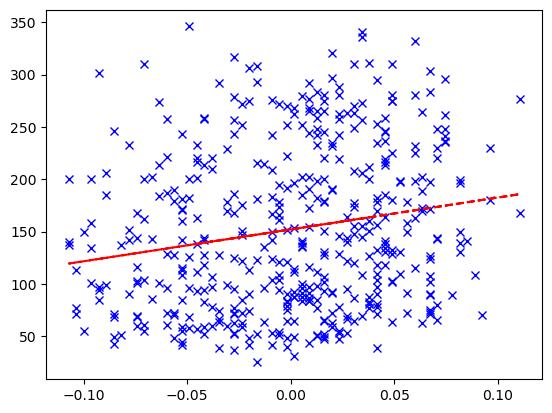

In [106]:
# initialize model
model = LinearRegression()

# get variable names from column header in the data frame
var_names = X.columns

# select first variable
var_name1 = var_names[0]

# select data associated with the first variable
x1 = X[var_name1]

# turn that dataframe column into a nx1 numpy array
x1_data = np.array([x1.to_numpy()]).T

# fit model
_ = model.fit(x1_data,y.to_numpy())

# get model predictions for each x value
yHat = model.predict(x1_data)

# get residuals
resid = yHat-y

# get R2 value
R2 = model.score(x1_data,y)
print('R2', R2)

# make a plot
plt.subplot(111)

# plot data
plt.plot(x1, y, marker='x', lw=0, color='blue')

# plot fit
plt.plot(x1, yHat, ls='--', color='red')

In [120]:
# STEP 2: Simple Linear Regression

# linear models for each independent variable:
var_names = X.columns

for i in range(len(var_names)-1):
    model2 = LinearRegression()
    
    var_name = var_names[i]
    print(var_name)
    
    x = X[var_name]
    
    x_data = np.array([x.to_numpy()]).T
    
    _ = model2.fit(x_data,y.to_numpy())
    
    yHat = model2.predict(x_data)
    
    resid = yHat-y

# calculate t statistic 
    mu = mean # population mean
    std = np.std(x_data)
    ste = std / (np.sqrt(len(x1_data)))
    tstat = ((x_data.mean() - mu) / ste)
    print("tStat: ", tstat)
    
# calculate RSS 
    R2 = model2.score(x_data,y)
    print('R2: ', R2)
    
# calculate the mean value 
    mean = sum(x_data)/len(x_data)
    print('mean: ', mean)

# calculate RSS
    RSS = sum(resid*resid)
    print ("RSS: ", RSS)
    
# calculate  MSE 
    MSE = RSS/len(x_data)
    print("len_x: ", len(x_data))
    print("MSE: ", MSE)
    
# calculate RSE 
    RSE = np.sqrt(RSS/(len(resid)-2))
    print("RSE: ", RSE)

# Plot for the model with the best fit: 
model3 = LinearRegression()

x2 = X[var_names[3]] # sex is variable with best fit

x2_data = np.array([x2.to_numpy()]).T

_ = model3.fit(x2_data,y.to_numpy())

yHat = model3.predict(x2_data)

resid = yHat - y

plt.subplot(111)

# plot data
plt.plot(x2, y, marker='x', lw=0, color='blue')

# plot fit
plt.plot(x2, yHat, ls='--', color='red')

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [131]:
# STEP 3: Multivariate Linear Regression
all_variables = []

for i in var_names:
    col = X[i]
    col_all_variables = np.array([col.to_numpy()]).T

    all_variables.append(col_all_variables)

x_data = np.array(all_variables).T

multivariateModel = LinearRegression()
_ = multivariateModel.fit(x_data, y.to_numpy())

# calculate an f-stat:

# Calculate RSS, MSE, RSE, and R^2




ValueError: Found array with dim 3. LinearRegression expected <= 2.